<a href="https://colab.research.google.com/github/Raries16/Practice/blob/main/B2019038_Raunak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Datasets"

In [4]:
#changing the working directory
%cd /content/gdrive/My Drive/Datasets

/content/gdrive/My Drive/Datasets


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
import warnings
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv("/content/gdrive/My Drive/Datasets/GIM_Goa_rolled_up_data.csv")
data

,Day,temp,atemp,humidity,windspeed,count
0,1/1/2011,14.110833,18.181250,80.583333,10.749871,985
1,1/2/2011,14.902609,17.686957,69.608696,16.652122,801
2,1/3/2011,8.050909,9.470227,43.727273,16.636709,1349
3,1/4/2011,8.200000,10.606087,59.043478,10.739809,1562
4,1/5/2011,9.305217,11.463478,43.695652,12.522300,1600
...,...,...,...,...,...,...
451,12/15/2012,13.290833,16.919167,65.041667,7.125450,5047
452,12/16/2012,14.862500,18.496875,83.875000,6.749692,3786
453,12/17/2012,16.126667,20.075000,90.708333,6.583308,4585
454,12/18/2012,16.844167,20.485417,66.625000,14.834079,5557


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Day        456 non-null    object 
 1   temp       456 non-null    float64
 2   atemp      456 non-null    float64
 3   humidity   456 non-null    float64
 4   windspeed  456 non-null    float64
 5   count      456 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 21.5+ KB


In [9]:
data.describe()

,temp,atemp,humidity,windspeed,count
count,456.000000,456.000000,456.000000,456.000000,456.000000
mean,20.186671,23.606959,61.889357,12.805332,4573.412281
std,7.379281,8.004275,14.192906,5.129944,1868.740135
min,4.407500,5.082917,0.000000,1.500242,605.000000
25%,14.068125,16.989479,51.218750,9.199956,3305.500000
50%,20.551250,24.494896,61.854167,12.146123,4585.500000
75%,26.615833,30.088662,71.843750,15.612960,5987.500000
max,35.328333,40.245625,97.041667,33.999988,8714.000000


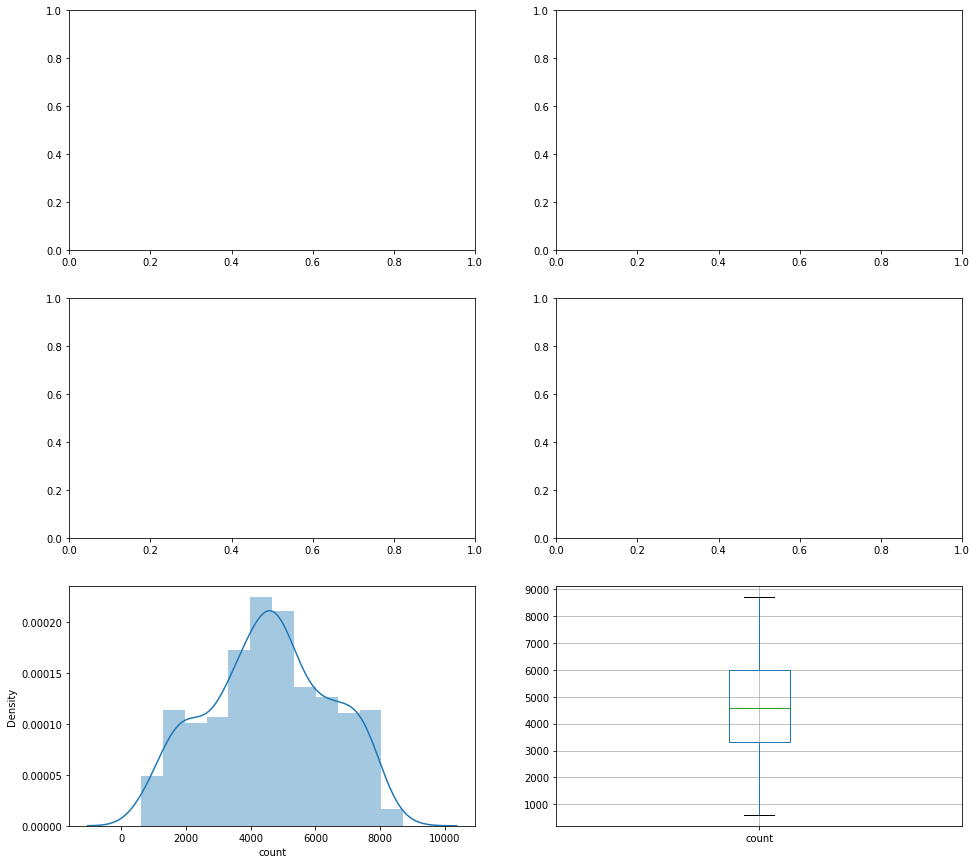

In [11]:
fig, ax = plt.subplots(3,2, figsize=(16,15))
#all customers distribution plots
sns.distplot(data["count"], ax=ax[2][0])
data.boxplot("count", ax=ax[2][1])

In [12]:
data['count_log'] = np.log((1+ data['count']))

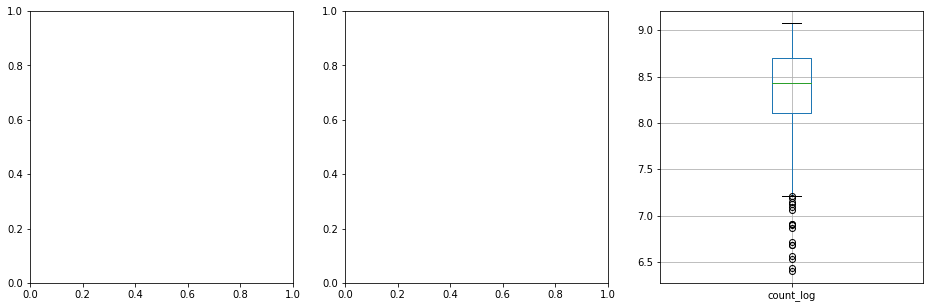

In [13]:
#resulting distributing
fig, ax = plt.subplots(1,3, figsize=(16,5))
data.boxplot("count_log", ax=ax[2])

fig.show()

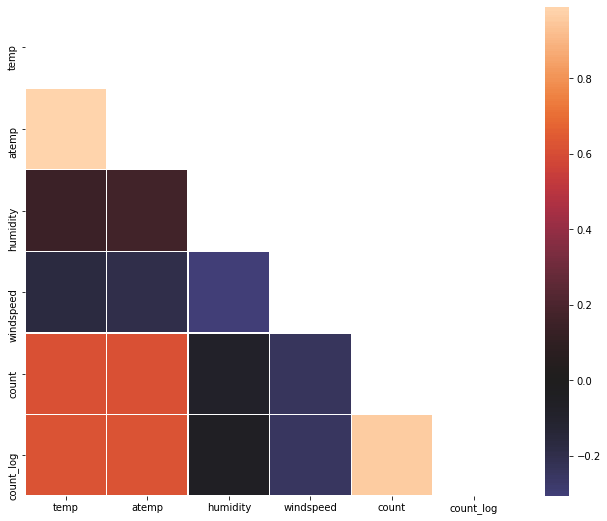

In [14]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap
sns.heatmap(corr, mask=mask, center=0,
            square=True, linewidths=.5)

In [16]:
#calculate the correlation between temp, atemp and humidity
correlation = data.corr()
correlation

,temp,atemp,humidity,windspeed,count,count_log
temp,1.000000,0.988777,0.146933,-0.163716,0.610687,0.617839
atemp,0.988777,1.000000,0.165025,-0.190875,0.612956,0.623920
humidity,0.146933,0.165025,1.000000,-0.305684,-0.077046,-0.050410
windspeed,-0.163716,-0.190875,-0.305684,1.000000,-0.235932,-0.248073
count,0.610687,0.612956,-0.077046,-0.235932,1.000000,0.954515
count_log,0.617839,0.623920,-0.050410,-0.248073,0.954515,1.000000


In [17]:
#importing packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [18]:
X = data[['temp' , 'atemp' , 'humidity' , 'windspeed']]
y = data['count']

In [20]:
from sklearn import linear_model

In [26]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
import statsmodels.api as sm

In [30]:
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  count   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                              1084.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):                   4.97e-230
Time:                        09:52:14   Log-Likelihood:                         -3987.3
No. Observations:                 456   AIC:                                      7983.
Df Residuals:                     452   BIC:                                      7999.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Temp is not significant as p value is greater than 0.05 and only atemp is significant 

In [31]:
X = data[[ 'atemp' ]]
y = data['count']